In [4]:
import pandas as pd
# 獲取資料
url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data = pd.read_csv(url)

x = data['YearsExperience']
y = data['Salary']

In [6]:
def compute_gradient(x,y,w,b):
    # Cost Function 對w作微分:
    w_gradient = (2*x*(w*x+b-y)).mean()
    # Cost Function 對b作微分:
    b_gradient = (2*(w*x+b-y)).mean() # mean() 計算平均

    return w_gradient, b_gradient

compute_gradient(x,y,20,10)

(537.0951515151515, 70.16969696969697)

In [9]:
def compute_cost(x, y, w, b):
    y_pred=w*x+b
    cost = (y-y_pred)**2
    cost = cost.sum() / len(x)

    return cost

In [10]:
# 假設 w=0 b=0
w=0
b=0
learning_rate=0.001
w_gradient, b_gradient = compute_gradient(x,y,w,b)
print(compute_cost(x, y, w, b))

w = w-w_gradient*learning_rate
b = b-b_gradient*learning_rate
print(compute_cost(x, y, w, b))

# 確認是否有降低 compute_cost

6040.596363636363
5286.0782714844245


In [17]:
# 利用 for迴圈 
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w: .2e}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [18]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3
run_iter = 20000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost  5.2861e+03, w:  8.72e-01, b:  1.45e-01, w_gradient: -8.72e+02, b_gradient: -1.45e+02
Iteration  1000 : Cost  9.6020e+01, w:  1.14e+01, b:  1.27e+01, w_gradient:  1.22e+00, b_gradient: -8.15e+00
Iteration  2000 : Cost  5.4275e+01, w:  1.05e+01, b:  1.91e+01, w_gradient:  7.18e-01, b_gradient: -4.78e+00
Iteration  3000 : Cost  3.9926e+01, w:  9.91e+00, b:  2.28e+01, w_gradient:  4.21e-01, b_gradient: -2.80e+00
Iteration  4000 : Cost  3.4993e+01, w:  9.59e+00, b:  2.49e+01, w_gradient:  2.47e-01, b_gradient: -1.64e+00
Iteration  5000 : Cost  3.3298e+01, w:  9.39e+00, b:  2.62e+01, w_gradient:  1.45e-01, b_gradient: -9.63e-01
Iteration  6000 : Cost  3.2715e+01, w:  9.28e+00, b:  2.70e+01, w_gradient:  8.48e-02, b_gradient: -5.65e-01
Iteration  7000 : Cost  3.2515e+01, w:  9.22e+00, b:  2.74e+01, w_gradient:  4.97e-02, b_gradient: -3.31e-01
Iteration  8000 : Cost  3.2446e+01, w:  9.18e+00, b:  2.76e+01, w_gradient:  2.92e-02, b_gradient: -1.94e-01
Iteration  9000 : C

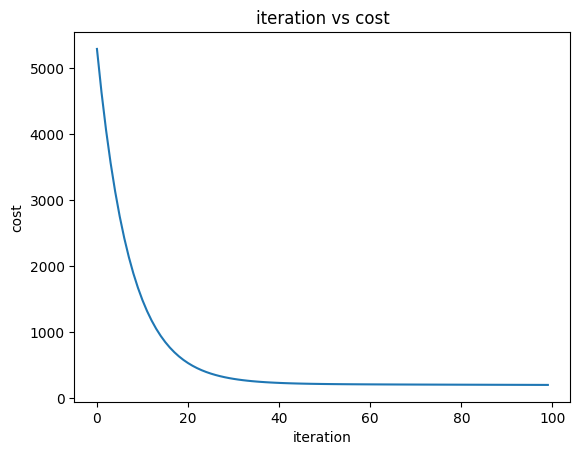

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [20]:
print(f"最終w b=({w_final:.2f}, {b_final:.2f})")

最終w b=(9.12, 28.01)


In [21]:
print(f"年資3.5  預測薪水:{w_final*3.5 + b_final:.1f}K")
print(f"年資5.9  預測薪水:{w_final*5.9 + b_final:.1f}K")

年資3.5  預測薪水:59.9K
年資5.9  預測薪水:81.8K


In [22]:
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

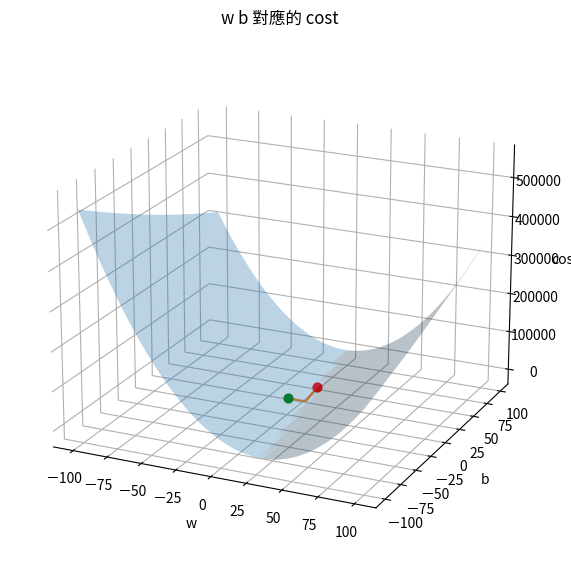

In [23]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
ax.plot(w_hist, b_hist, c_hist)

plt.show()